### Computer Vision and Object Detection

Computer Vision API를 사용하여 이미지 속에 사물을 인식하는 데모 코드
네트워크 통신을 위해 requests 패키지를 import함


In [4]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.
matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [6]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [7]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [8]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [9]:
analyze_url = vision_base_url + 'analyze'

In [10]:
image_url = 'https://static.news.zumst.com/images/83/2015/02/25/PYH2015022515390005300_P2.jpg'

In [11]:
response = requests.get(image_url)

In [12]:
image = Image.open(BytesIO(response.content))

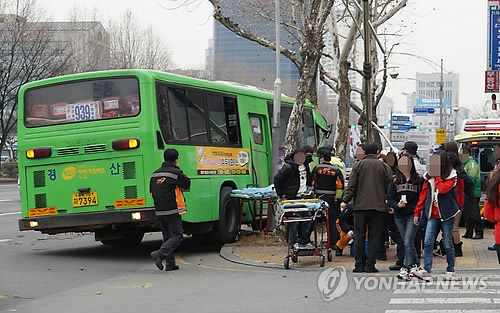

In [13]:
image


In [14]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [16]:
response = requests.post(analyze_url, headers = headers, params=params, json = data)

In [18]:
analysis = response.json()

In [19]:
analysis

{'categories': [{'name': 'trans_bus', 'score': 0.97265625}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey', 'White', 'Black'],
  'accentColor': '408D3E',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['outdoor',
   'road',
   'green',
   'street',
   'building',
   'person',
   'city',
   'bus',
   'people',
   'truck',
   'walking',
   'man',
   'busy',
   'riding',
   'parked',
   'stop',
   'driving',
   'group',
   'standing',
   'woman',
   'traffic'],
  'captions': [{'text': 'a group of people walking down a street next to a bus',
    'confidence': 0.9157588705580979}]},
 'requestId': '82253c96-53e8-43e4-89f4-dbb0460887ec',
 'metadata': {'height': 313, 'width': 500, 'format': 'Jpeg'}}

In [20]:
analysis['description']['captions'][0]['text']

'a group of people walking down a street next to a bus'

### Object detection

In [21]:
objectDetection_url = vision_base_url + 'detect'

In [22]:
object_image = 'https://file.mk.co.kr/meet/neds/2021/11/image_readtop_2021_1040922_16359022814837090.jpg'

In [28]:
img = Image.open(BytesIO(requests.get(object_image).content))

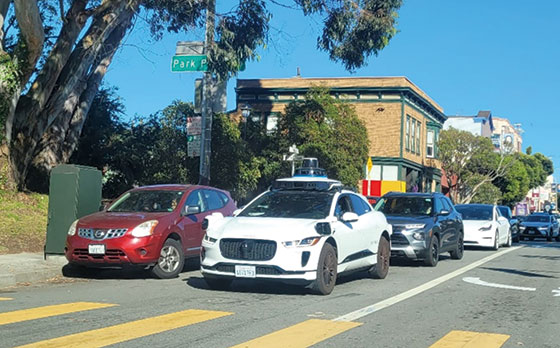

In [29]:
img

In [31]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
data = {'url':object_image}

In [32]:
response = requests.post(objectDetection_url, headers = headers, json = data)

In [35]:
detectionResult = response.json()

In [37]:
detectionResult

{'objects': [{'rectangle': {'x': 458, 'y': 205, 'w': 61, 'h': 44},
   'object': 'car',
   'confidence': 0.679,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.769,
    'parent': {'object': 'Vehicle', 'confidence': 0.77}}},
  {'rectangle': {'x': 527, 'y': 212, 'w': 28, 'h': 31},
   'object': 'Land vehicle',
   'confidence': 0.5,
   'parent': {'object': 'Vehicle', 'confidence': 0.501}},
  {'rectangle': {'x': 65, 'y': 179, 'w': 174, 'h': 100},
   'object': 'car',
   'confidence': 0.873,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.882,
    'parent': {'object': 'Vehicle', 'confidence': 0.882}}},
  {'rectangle': {'x': 198, 'y': 175, 'w': 189, 'h': 118},
   'object': 'car',
   'confidence': 0.9,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.917,
    'parent': {'object': 'Vehicle', 'confidence': 0.917}}},
  {'rectangle': {'x': 370, 'y': 192, 'w': 93, 'h': 77},
   'object': 'car',
   'confidence': 0.667,
   'parent': {'object': 'Land vehicle',
    'conf

In [38]:
from PIL import Image, ImageDraw, ImageFont

In [59]:
draw = ImageDraw.Draw(img)

objects = detectionResult['objects']

for obj in objects:
    print(obj)
    
    rect = obj['rectangle']
    
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    
    draw.rectangle(((x,y),(x+w,y+h)), outline ='red') #사각형 그리는 코드
    
    objectName = obj['object']
    draw.text((x, y),objectName, fill = 'blue')

{'rectangle': {'x': 458, 'y': 205, 'w': 61, 'h': 44}, 'object': 'car', 'confidence': 0.679, 'parent': {'object': 'Land vehicle', 'confidence': 0.769, 'parent': {'object': 'Vehicle', 'confidence': 0.77}}}
{'rectangle': {'x': 527, 'y': 212, 'w': 28, 'h': 31}, 'object': 'Land vehicle', 'confidence': 0.5, 'parent': {'object': 'Vehicle', 'confidence': 0.501}}
{'rectangle': {'x': 65, 'y': 179, 'w': 174, 'h': 100}, 'object': 'car', 'confidence': 0.873, 'parent': {'object': 'Land vehicle', 'confidence': 0.882, 'parent': {'object': 'Vehicle', 'confidence': 0.882}}}
{'rectangle': {'x': 198, 'y': 175, 'w': 189, 'h': 118}, 'object': 'car', 'confidence': 0.9, 'parent': {'object': 'Land vehicle', 'confidence': 0.917, 'parent': {'object': 'Vehicle', 'confidence': 0.917}}}
{'rectangle': {'x': 370, 'y': 192, 'w': 93, 'h': 77}, 'object': 'car', 'confidence': 0.667, 'parent': {'object': 'Land vehicle', 'confidence': 0.726, 'parent': {'object': 'Vehicle', 'confidence': 0.726}}}


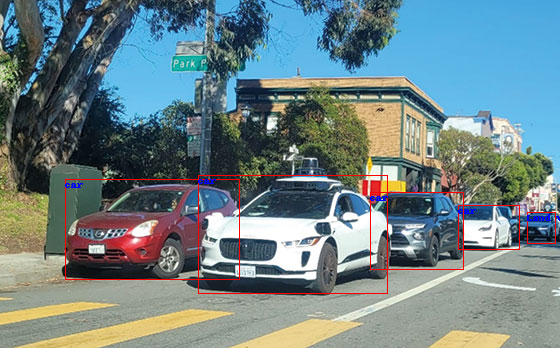

In [60]:
img